In [124]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [125]:
energy = pd.read_csv("energydata_complete.csv")

In [126]:
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


[0, 1200, 0, 6000]

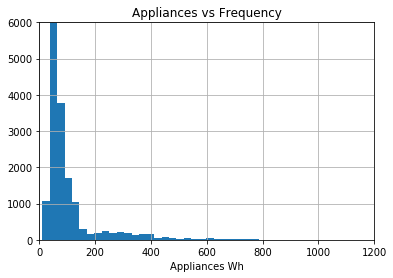

In [127]:
energy.hist('Appliances', bins = 40)
plt.title("Appliances vs Frequency")
plt.xlabel("Appliances Wh")
plt.axis([0, 1200, 0, 6000])

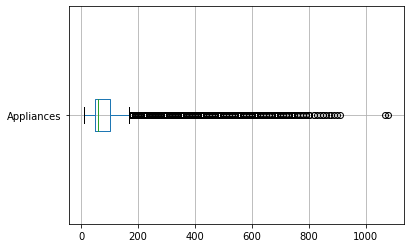

In [128]:
energy.boxplot('Appliances', vert = 0)

In [129]:
reg = linear_model.LinearRegression()
X = energy[['T_out']]
y = energy['Tdewpoint']
reg.fit(X,y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [0.62371474] + -0.8620575780915019


In [130]:
xmin = X.min()
ymin = reg.coef_[0] * xmin + reg.intercept_
xmax = X.max()
ymax = reg.coef_[0] * xmax + reg.intercept_

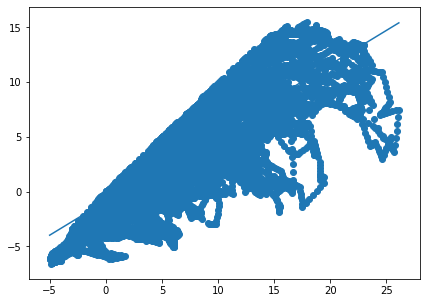

In [131]:
plt.figure(figsize=(7,5))
plt.plot([xmin,xmax],[ymin,ymax])
plt.scatter(X,y)

In [132]:
mse = ((y-reg.predict(X))**2).mean()
print(mse, np.sqrt(mse))

6.595257157509071 2.5681232753723235


In [133]:
predicted = reg.predict(X)
print("MSE:", mean_squared_error(y,predicted))
print("R^2:", r2_score(y,predicted))

MSE: 6.595257157509068
R^2: 0.6251454985449821


In [134]:
#import training
energy_train = pd.read_csv("training.csv")
X_train = energy_train[['T_out']]
y_train = energy_train['Tdewpoint']

In [135]:
#import testing
energy_test = pd.read_csv("testing.csv")
X_test = energy_test[['T_out']]
y_test = energy_test['Tdewpoint']

In [136]:
#MSE and R^2 for training and testing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
predicted = reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 6.442875537334617
R^2: 0.6308350186745595


In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(15788, 5) (3947, 5)


In [139]:
feature_cols = np.array(['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility'])
X = energy[feature_cols]
y = energy['Tdewpoint']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [144]:
from sklearn.feature_selection import RFE

estimator = linear_model.LinearRegression()
selector = RFE(estimator, 3)
selector = selector.fit(X, y)

supp = selector.get_support()
print("Selected features:", feature_cols[supp])
print("Coeffs:", selector.estimator_.coef_)
# test the model
predicted = selector.predict(X)
print("MSE:", mean_squared_error(y, predicted))
print("R^2:", r2_score(y, predicted))

Selected features: ['T_out' 'RH_out' 'Windspeed']
Coeffs: [0.95275011 0.20661105 0.03844259]
MSE: 0.27166390117015854
R^2: 0.9845594441877795
